# CS 224D: Assignment #1

# 1 - Softmax

#### a - Prove that the softmax is invariant to constant offsets in the input, that is, for any input vector $x$ and any constant $c$, 
$softmax(x) = softmax(x + c)$
when $x + c$ means adding the constant $c$ to every dimension of $x$. Remember that: 

$softmax(x)_i = \frac{e^{x_i}}{\sum_je^{x_j}}$

a - anwer: Adding a constant $c$ changes both the numerator and the denominator the same way, which does not affect the result after division. 

It is usually computationnaly difficult to compute sums of exponentials with low arguments. Hence, we will use this property to normalize the arguments  and set $c = -max_i x_i$, ie that we substract the maximum element from all elements of $x$.

#### b - Given an input matrix of N rows and d columns, compute the softmax predictions for each row. Write your implementation in q1_softmax.py. You may test by executing python q1_softmax.py

In [1]:
import numpy as np
import random

In [2]:
def softmax(x):
    """
    Compute the softmax function for each row of the input x.

    It is crucial that this function is optimized for speed because
    it will be used frequently in later code.
    You might find numpy functions np.exp, np.sum, np.reshape,
    np.max, and numpy broadcasting useful for this task. (numpy
    broadcasting documentation:
    http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

    You should also make sure that your code works for one
    dimensional inputs (treat the vector as a row), you might find
    it helpful for your later problems.

    You must implement the optimization in problem 1(a) of the 
    written assignment!
    """
    
    """
    Moreover, to be as general as possible, we suppose that x is a 2D array, 
    N rows and d columns
    """
    
    """
    Remark: we must also consider the specific case where N = 1
    """

    ### YOUR CODE HERE
    
    # Case N > 1
    if len(x.shape) > 1:
        
        ## normalization part

        # First define the column containing the max of each row in x
        max_row = x.max(axis = 1).reshape((x.shape[0], 1))
        # Then remove this max to the dataset
        x -= max_row

        ## computation of softmax

        x = np.exp(x)
        denominator = x.sum(axis = 1).reshape(x.shape[0], 1)
        x /= denominator
        
    else:
        
        ## normalization part
        
        max_row = x.max()
        x -= max_row
        x = np.exp(x)
        denominator = x.sum()
        x /= denominator
    
    ### END YOUR CODE
    
    return x

In [3]:
# Toy example
softmax(np.array([1,2]))

array([ 0.26894142,  0.73105858])

Now let's test this function

In [4]:
def test_softmax_basic():
    """
    Some simple tests to get you started. 
    Warning: these are not exhaustive.
    """
    print("Running basic tests...")
    test1 = softmax(np.array([1,2]))
    print(test1)
    assert np.amax(np.fabs(test1 - np.array(
        [0.26894142,  0.73105858]))) <= 1e-6

    test2 = softmax(np.array([[1001,1002],[3,4]]))
    print(test2)
    assert np.amax(np.fabs(test2 - np.array(
        [[0.26894142, 0.73105858], [0.26894142, 0.73105858]]))) <= 1e-6

    test3 = softmax(np.array([[-1001,-1002]]))
    print(test3)
    assert np.amax(np.fabs(test3 - np.array(
        [0.73105858, 0.26894142]))) <= 1e-6

    print("You should verify these results!\n")
test_softmax_basic()

Running basic tests...
[ 0.26894142  0.73105858]
[[ 0.26894142  0.73105858]
 [ 0.26894142  0.73105858]]
[[ 0.73105858  0.26894142]]
You should verify these results!



## 2 - Neural Network Basics

#### a - Derive the gradients of the sigmoid function and show that it can be rewritten as a function of the function value (ie in some expression where only $\sigma (x)$, but not $x$, ispresent). Assume that the input $x$ is a sclarar for this question. Recall, the sigmoid function is: 

$\sigma (x) = \frac{1}{1 + e^{-x}}$

a - Answer: let's compute the gradient of $\sigma$: 

$\sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x)(1 - \sigma(x))$

#### b - Derive the gradient with regard to the inputs of a softmax function when cross entropy loss is used for evaluation, ie find the gradients with respect to the softmax input vector $\theta$, when the prediction is made by $\widehat y = softmax(\theta)$. Remember the cross entropy function is: 

$CE(y, \widehat y) = -\sum_iy_ilog(\widehat y_i)$ 

where $y$ is the one-hot label vector, and $\widehat y$ is the predicted probability vector for all classes (Hint: you might want to consider the fact many elements of $y$ are zeros, and assume that only the $k$-th dimension of $y$ is one).

b - Answer: As proposed, let's assume that the only non-zero value for $y$ is for the $k$-th element. We have then: 

$CE(y, \widehat y) = -log(\widehat y_k) = -log(softmax(\theta)_k) = -log(\frac{e^{\theta_k}}{\sum_i e^{\theta_i}}) = -\theta_k + log(\sum_i e^{\theta_i})$

Now, let's differentiate this result w.r.t. $\theta_j$ for a certain $j$-th coordinate of $\theta$.

We have: 

$\frac{\partial CE(y, \widehat y)}{\partial \theta_j} = -1 + \frac{e^{\theta_j}}{\sum_i e^{\theta_i}}$ if $j = k$ and 

$\frac{\partial CE(y, \widehat y)}{\partial \theta_j} = \frac{e^{\theta_j}}{\sum_i e^{\theta_i}}$ if $j \neq k$

We can rewrite this result as: 

$\frac{\partial CE(y, \widehat y)}{\partial \theta} = \widehat y - y$

#### c - Derive the gradients w.r.t. the inputs $x$ to an one-hidden-layer neural network (that is, find $\frac{\partial J}{\partial x}$ where $J$ is the cost function for the neural network). The neural network employs sigmoid activation function for the hidden layer, and softmax for the outpu layer. Assume the one-hot label vector is $y$, and cross-entropy cost is used. Feel free to use $\sigma'(x)$ as the shorthand for sigmoid gradient, and feel free to define any variables whenever you see fit.

Recall tha the forward propagation is as follows: 

$h = sigmoid(xW_1 + b_1)$

$\widehat y = softmax(hW_2 + b_2)$

Note that here we're assuming that the input vector (this the hidden variables and output probabilities) is a row vector to be consistent with the programming assignment. When we apply the sigmoid function to a vector, we are applying it to each of the elements of that vector. $W_i$ and $b_i$ ($i = 1, 2$) are the weights and biases, respectively, of the two layers.

c - Answer:

Let's write $\theta = hW_2 + b_2$

We know from Part1 that: 

$\frac{\partial J}{\partial \theta} = \widehat y - y$

Then, using the chain rule, we have: 

$\frac{\partial J}{\partial h} = \frac{\partial J}{\partial \theta} \frac{\partial \theta}{\partial h} = (\widehat y - y)W_2^T$

Therefore, still using the chain rule, we obtain: 

$\frac{\partial J}{\partial x} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial x} = (\widehat y - y)W_2^TW_1^T$


#### d - How many parameters are there in this neural network, assuming the input is $D_x$-dimensional, the output is $D_y$-dimensional, and theere are $H$ hidden units?

d - Answer: 

In $W_1$ we have $D_x . H$ corefficients, in $W_2$ we have $H . D_y$ coefficients. Then, $b_1$ contains $H$ elements and $b_2$ contains $D_y$ elements.

Hence, the total number of parameters used in this neural network is: 

$\#_{parameters} = (D_x + 1) . H + (H + 1) . D_y$

#### e - Fill in the implementation for the sigmoid implementation and its gradient in q2_sigmoid.py. Test your implementation using python q2_sigmoid.py. Again, thoroughly test your codes as the provided tests may not be exhaustive.

In [5]:
def sigmoid(x):
    """
    Compute the sigmoid function for the input here.
    """
    
    ### YOUR CODE HERE
    x = 1 / (1 + np.exp(-x))
    ### END YOUR CODE
    
    return x

def sigmoid_grad(f):
    """
    Compute the gradient for the sigmoid function here. Note that
    for this implementation, the input f should be the sigmoid
    function value of your original input x. 
    """
    
    ### YOUR CODE HERE
    f = f*(1 - f)
    ### END YOUR CODE
    
    return f


In [6]:
x = np.array([[1, 2], [8, 0]])
1 / (1 + np.exp(-x))

array([[ 0.73105858,  0.88079708],
       [ 0.99966465,  0.5       ]])

Let's test these functions

In [7]:
def test_sigmoid_basic():
    """
    Some simple tests to get you started. 
    Warning: these are not exhaustive.
    """
    print("Running basic tests...")
    x = np.array([[1, 2], [-1, -2]])
    f = sigmoid(x)
    g = sigmoid_grad(f)
    print(f)
    assert np.amax(f - np.array([[0.73105858, 0.88079708], 
        [0.26894142, 0.11920292]])) <= 1e-6
    print(g)
    assert np.amax(g - np.array([[0.19661193, 0.10499359],
        [0.19661193, 0.10499359]])) <= 1e-6
    print("You should verify these results!\n")
test_sigmoid_basic()

Running basic tests...
[[ 0.73105858  0.88079708]
 [ 0.26894142  0.11920292]]
[[ 0.19661193  0.10499359]
 [ 0.19661193  0.10499359]]
You should verify these results!



#### f - To make debugging easier, we will now implement a gradient checker. Fill in the implementation for gradchecker_naive in q2_gradcheck.py. Test your code using python q2_gradcheck.py.

In [8]:
# First implement a gradient checker by filling in the following functions
def gradcheck_naive(f, x):
    """ 
    Gradient check for a function f 
    - f should be a function that takes a single argument and outputs the cost and its gradients
    - x is the point (numpy array) to check the gradient at
    """ 

    rndstate = random.getstate()
    random.setstate(rndstate)  
    fx, grad = f(x) # Evaluate function value at original point
    h = 1e-4

    # Iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        ### try modifying x[ix] with h defined above to compute numerical gradients
        ### make sure you call random.setstate(rndstate) before calling f(x) each time, this will make it 
        ### possible to test cost functions with built in randomness later
        
        ### YOUR CODE HERE:
        
        x[ix] += h # Go to a h-step forward
        random.setstate(rndstate)  
        fxh, _ = f(x) # evaluate f on x + h
        x[ix] -= 2 * h  # Go to a h-step backward compared to initial x
        random.setstate(rndstate)  
        fxnh, _ = f(x) # Evaluate f on x - h
        x[ix] += h
        numgrad = (fxh - fxnh) / 2 / h # Evaluate the gradient as the tangent at the initial point x
        
        ### END YOUR CODE
        
                
        # Compare gradients
        reldiff = abs(numgrad - grad[ix]) / max(1, abs(numgrad), abs(grad[ix]))
        if reldiff > 1e-5:
            print("Gradient check failed.")
            print("First gradient error found at index %s" % str(ix))
            print("Your gradient: %f \t Numerical gradient: %f" % (grad[ix], numgrad))
            return
    
        it.iternext() # Step to next dimension

    print("Gradient check passed!")

Let's use the sanity check

In [9]:
def sanity_check():
    """
    Some basic sanity checks.
    """
    quad = lambda x: (np.sum(x ** 2), x * 2)

    print("Running sanity checks...")
    gradcheck_naive(quad, np.array(123.456))      # scalar test
    gradcheck_naive(quad, np.random.randn(3,))    # 1-D test
    gradcheck_naive(quad, np.random.randn(4,5))   # 2-D test
    print("")
sanity_check()

Running sanity checks...
Gradient check passed!
Gradient check passed!
Gradient check passed!



#### g - Now, implement the forward and backward passes for neural network with one sigmoid hidden layer. Fill in your imlementation in q2_neural.py. Sanity check your implementation with q2_neural.py.

In [10]:
from q1_softmax import softmax
from q2_sigmoid import sigmoid, sigmoid_grad
from q2_gradcheck import gradcheck_naive

def forward_backward_prop(data, labels, params, dimensions):
    """ 
    Forward and backward propagation for a two-layer sigmoidal network 
    
    Compute the forward propagation and for the cross entropy cost,
    and backward propagation for the gradients for all parameters.
    """

    ### Unpack network parameters (do not modify)
    ofs = 0
    Dx, H, Dy = (dimensions[0], dimensions[1], dimensions[2])

    W1 = np.reshape(params[ofs:ofs+ Dx * H], (Dx, H))
    ofs += Dx * H
    b1 = np.reshape(params[ofs:ofs + H], (1, H))
    ofs += H
    W2 = np.reshape(params[ofs:ofs + H * Dy], (H, Dy))
    ofs += H * Dy
    b2 = np.reshape(params[ofs:ofs + Dy], (1, Dy))

    ### YOUR CODE HERE: forward propagation
    h = sigmoid(data.dot(W1) + b1)
    pred = softmax(h.dot(W2) + b2)
    cost = -np.sum(labels * np.log(pred))
    ### END YOUR CODE
    
    ### YOUR CODE HERE: backward propagation
    delta_0 = pred - labels
    gradW2 = h.T.dot(delta_0)
    gradb2 = np.sum(delta_0, axis = 0) # here, gradb2 is the product of a lign of 1's (gradient of b1 wrt to b1)
                                         # and delta_0
    delta = delta_0.dot(W2.T)*sigmoid_grad(h) # Useful for 2 following lines so we compute it 
                                              # only once
    gradW1 = data.T.dot(delta)
    gradb1 = np.sum(delta, axis = 0) # Same reason as for gradb2
    
    ### END YOUR CODE
    
    ### Stack gradients (do not modify)
    grad = np.concatenate((gradW1.flatten(), gradb1.flatten(), 
        gradW2.flatten(), gradb2.flatten()))
    
    return cost, grad


Let's pass a sanity check

In [11]:
def sanity_check():
    """
    Set up fake data and parameters for the neural network, and test using 
    gradcheck.
    """
    print("Running sanity check...")

    N = 20
    dimensions = [10, 5, 10]
    data = np.random.randn(N, dimensions[0])   # each row will be a datum
    labels = np.zeros((N, dimensions[2]))
    for i in range(N):
        labels[i,random.randint(0,dimensions[2]-1)] = 1
    
    params = np.random.randn((dimensions[0] + 1) * dimensions[1] + (
        dimensions[1] + 1) * dimensions[2], )

    gradcheck_naive(lambda params: forward_backward_prop(data, labels, params,
        dimensions), params)
sanity_check()

Running sanity check...
Gradient check passed!


## 3 - Word2vec

#### a - Assume you are given a predicted word vector $v_c$, corresponding to the center word $c$ for skipgram, and word prediction is made with the softmax function found in $word2vec$ models: 

$\widehat y_o = p(o|c) = \frac{exp(u_o^Tv_c)}{\sum_{w = 1}^{W}exp(u_w^Tv_c)}$.

where $w$ denotes the $w$-th word and $u_w$ ($w = 1, ..., W$) are the "output" word vectors for all words in the vocabulary. Assume cross entropy cost is applied to this prediction and word $o$ is the expected word (the $o$-th element of the one-hot label vector is one), derive the gradients with respecte to $v_c$.

Hint: it will be helpful to use notation from Question 2. For instance, letting $\widehat y$ be the vector of softmax predictions for every word, $y$ as the expected word vectror, and the loss function

$J_{softmax-CE}(o, v_c, U) = CE(y, \widehat y)$

where $U = [u_1, u_2, ..., u_w]$ is the matrix of all the output vectors. Make sure you state the orientation of your vectors and matrices.

a - Answer: 

The question asks to compute the following: 

$\frac{\partial -log(\frac{exp(u_o^Tv_c)}{\sum_{w = 1}^{W}exp(u_w^Tv_c)})}{\partial v_c} = \frac{\partial -u_o^Tv_c}{\partial v_c} + \frac{log(\sum_{w = 1}^W exp(u_w^Tv_c))}{\partial v_c} = -u_o + \frac{\sum_{i = 1}^W u_iexp(u_i^Tv_c)}{\sum_{w = 1}^W ex^(u_w^Tv_c)}$

We can rearrange this expression by: 

$\frac{\partial -log(\frac{exp(u_o^Tv_c)}{\sum_{w = 1}^{W}exp(u_w^Tv_c)})}{\partial v_c} = -u_o + \sum_{i = 1}^W u_i p(i | c)$, 

which may be rewritten as: 

$\frac{\partial J}{\partial v_c} = -u_o + \sum_{w = 1}^W \widehat y_w u_w$

#### b - As in the previous part, derive the gradients for the "ouput" word vectors $u_w$'s (including $u_o$).

b - Answer: 

We have: 

$\frac{\partial J}{\partial u_k} = \frac{\partial -u_o^Tv_c}{\partial u_k} + \frac{log(\sum_w exp(u_w^Tv_c))}{\partial u_k}$

If $k = o$, we have: 

$\frac{\partial J}{\partial u_k} = -v_c + v_c p(o | c) = v_c(\widehat y_o - 1)$

If $k \neq o$ we have: 

$\frac{\partial J}{\partial u_k} = v_c p(k | c) = v_c\widehat y_k$

This may be rewritten as: 

$\frac{\partial J}{\partial U} = v_c(\widehat y - y)^T$

#### c - Repeat part (a) and (b) assuming we are using the negative sampling loss for the predicted vectors $v_c$, and the expected output word is $o$. Assume that K negative samples (words) are drawn, and they are $1, ..., K$, respectively for simplicity of notation ($o \notin {1, ..., K}$). Again, for a given word $o$, denote its output vector as $u_o$. The negative sampling loss function in this case is: 

$J_{neg-sample}(o, v_c, U) = -log(\sigma(u_o^Tv_c)) - \sum_{k = 1}^K log(\sigma(-u_k^Tv_c))$

where $\sigma(.)$ is the sigmoid function.

After you've done this, describe with one sentence why this cost function is much more efficient to compute that softmax-CE loss (you could provide a speed-up ratio, ie the runtime of the softmax-CE loss divided by the runtime of the negative sampling-loss).

Note: the cost function here is the negative of what Mikolov et al had in their original paper, because we are doing a minimization instead of a maximization in our code.

c - Answer: 

- We first compute the gradient w.r.t. $v_c$

$\frac{\partial J_{neg-sample}}{\partial v_c} = \frac{\partial -log(\sigma(u_o^Tv_c))}{\partial v_c} + \frac{\partial -\sum_{k = 1}^K log(\sigma(-u_k^Tv_c))}{\partial v_c}$

We use the property of the derivative of the sigmoid to compute the result as: 

$\frac{\partial J_{neg-sample}}{\partial v_c} = u_o(\sigma(u_o^Tv_c) - 1) - \sum_{k = 1}^K u_k(\sigma(-u_k^Tv_c) - 1)$

- Then, we compute the gradient w.r.t. $u_o$

We have: 

$\frac{\partial J_{negative-sample}}{\partial u_o} = v_c(\sigma (u_o^Tv_c) - 1)$  (we remind that $o \notin {1, ..., K}$)

- Finally, we compute the gradient w.r.t. $u_k$ with $k \in {1, ..., K}$.

We have: 
$\frac{\partial J_{negative-sample}}{\partial u_k} = -v_c(\sigma(-u_k^Tv_c) - 1)$


This cost function is interesting in the fact that, at each iteration in the optimization algorithm that we will use, while computing a gradient, we need to compute small sums, with $K$ terms. On the contrary, with cross entropy loss function, we need to compute softmax output, which consists in sums over the whole vocabulary!! Hence, the implementation with negative sampling will be more efficient in terms of running time.

#### d - Derive gradients for all of the word vectors for skip-grtam and CBOW given the previous parts and given a set of context words $[word_{c - m}, ..., word_{c - 1}, word_c, word-{c + 1}, ..., word_{c + m}]$, where $m$ is the context size. Denote the "input" and "output" word vectors for $word_k$ as $v_k$ and $u_k$ respectively.

Hint: feel free to use $F(o, v_c)$ (where $o$ is the expected word as a placeholder for the $J_{Softmax-CE}(o, v_c, ...)$ or $J_{neg-sample}(o, v_c, ...)$) cost functions in this part - you'll see that this is a useful abstraction for the coding part. That is, your solution may contain terms of the form $\frac{\partial F(o, v_c)}{\partial ...}$.

Recall that for skip-gram, the cost for a context centered around c is: 

$J_{skip-gram}(word_{c - m, ..., c + m}) = \sum_{-m \leqslant j \leqslant m, j \neq 0}F(w_{c + j}, v_c)$

where $w_{c + j}$ refers to the word at the $j$-th index from center.

CBOW is slightly different. Instead of using $v_c$ as the predicted vector, we use $\widehat v$ defined below. For (a simpler variant of) CBOW, we sum up the input word vectors in the context

$\widehat v = \sum_{-m \leqslant j \leqslant m, j \neq 0}v_{c + j}$

then the CBOW cost is 

$J_{CBOW}(word_{c - m, ..., c + m}) = F(w_c, \widehat v)$

Note: To be consistent with the $\widehat v$ notation such as for the code portion, for skip-gram $\widehat v = v_c$.

d - Answer: 

- We have for Skip-Gram model 

    - $\frac{\partial J_{skip-gram}(word_{c - m, ..., c + m})}{\partial U} = \sum_{-m \leqslant j \leqslant m, j \neq 0}\frac{\partial F(w_{c + j}, v_c)}{\partial U}$
    
    - $\frac{\partial J_{skip-gram}(word_{c - m, ..., c + m})}{\partial v_c} = \sum_{-m \leqslant j \leqslant m, j \neq 0}\frac{\partial F(w_{c + j}, v_c)}{\partial v_c}$
    
    - $\frac{\partial J_{skip-gram}(word_{c - m, ..., c + m})}{\partial v_c} = 0$, for all $j \neq c$.
    
    
- For CBOW model, we have: 

    - $\frac{\partial J_{CBOW}(word_{c - m, ..., c + m})}{\partial U} = \frac{\partial F(w_{c}, \widehat v)}{\partial U}$
    
    - $\frac{\partial J_{CBOW}(word_{c - m, ..., c + m})}{\partial v_c} = \frac{\partial F(w_{c}, \widehat v)}{\partial \widehat v}$ for all $j$ such that $v_j$ is in the contaxt
    
    - $\frac{\partial J_{CBOW}(word_{c - m, ..., c + m})}{\partial v_c} = 0$, for all $j$ such that $v_j$ is not in the contaxt.

#### d - In this part, you will implement $word2vec$ models and train your own word vectors with stochastic gradient descent (SGD). First, write a helper function to normalize rows of a matrix in q3_word2vec.py. In the same file, fill in the implementation for the softmax and negative sampling cost and gradient functions. Then, fill in the implementation of the cost and gradient functions for the skip-gram model. When you are done, test your implementation by running python q3_word2vec.py.

Note: If you choose not to implement CBOW (part h), simply remove the NotImplementedError so that your tests will complete.

First, let's code the normalization function

In [12]:
x = np.array([[1, 2], [5, 2]])
x / np.sqrt(np.sum(x**2, axis = 1)).reshape((x.shape[0], 1))

array([[ 0.4472136 ,  0.89442719],
       [ 0.92847669,  0.37139068]])

In [13]:
from q1_softmax import softmax
from q2_gradcheck import gradcheck_naive
from q2_sigmoid import sigmoid, sigmoid_grad

def normalizeRows(x):
    """ Row normalization function """
    # Implement a function that normalizes each row of a matrix to have unit length
    
    ### YOUR CODE HERE
    
    # Create the array of sums of squares by row
    aux = np.sqrt(np.sum(x**2, axis = 1))
    # Shape it to a column
    aux = aux.reshape((x.shape[0], 1))
    
    # Normalize the rows
    x /= aux
    
    ### END YOUR CODE
    
    return x

Let's test this function

In [14]:
def test_normalize_rows():
    print("Testing normalizeRows...")
    x = normalizeRows(np.array([[3.0,4.0],[1, 2]])) 
    # the result should be [[0.6, 0.8], [0.4472, 0.8944]]
    print(x)
    assert (x.all() == np.array([[0.6, 0.8], [0.4472, 0.8944]]).all())
    print("")
test_normalize_rows()

Testing normalizeRows...
[[ 0.6         0.8       ]
 [ 0.4472136   0.89442719]]



Then, let's implement the softmax cost and gradient functions.

In [15]:
def softmaxCostAndGradient(predicted, target, outputVectors, dataset):
    """ Softmax cost function for word2vec models """
    
    # Implement the cost and gradients for one predicted word vector  
    # and one target word vector as a building block for word2vec     
    # models, assuming the softmax prediction function and cross      
    # entropy loss.                                                   
    
    # Inputs:                                                         
    # - predicted: numpy ndarray, predicted word vector (\hat{v} in 
    #   the written component or \hat{r} in an earlier version)
    # - target: integer, the index of the target word               
    # - outputVectors: "output" vectors (as rows) for all tokens     
    # - dataset: needed for negative sampling, unused here.         
    
    # Outputs:                                                        
    # - cost: cross entropy cost for the softmax word prediction    
    # - gradPred: the gradient with respect to the predicted word   
    #        vector                                                
    # - grad: the gradient with respect to all the other word        
    #        vectors                           .                    
    
    # We will not provide starter code for this function, but feel    
    # free to reference the code you previously wrote for this        
    # assignment!                                                  
    
    ### YOUR CODE HERE
    
    proba = softmax(predicted.dot(outputVectors.T))
    
    # Compte cost
    cost = -np.log(proba[target])
    
    # Compute the deltaç_0
    delta_0 = proba
    delta_0[target] -= 1 # to be consistent with the formulas we demonstrated in Part 1
    
    # Use previous expression for gradients
    grad = delta_0.reshape((delta_0.shape[0], 1)) * predicted.reshape((1, predicted.shape[0]))
    gradPred = (delta_0.reshape((1, delta_0.shape[0])).dot(outputVectors)).flatten()
    
    
    ### END YOUR CODE
    
    return cost, gradPred, grad

And now, let's do the same for CBOW.

In [16]:
def negSamplingCostAndGradient(predicted, target, outputVectors, dataset, 
    K=10):
    """ Negative sampling cost function for word2vec models """

    # Implement the cost and gradients for one predicted word vector  
    # and one target word vector as a building block for word2vec     
    # models, using the negative sampling technique. K is the sample  
    # size. You might want to use dataset.sampleTokenIdx() to sample  
    # a random word index. 
    # 
    # Note: See test_word2vec below for dataset's initialization.
    #                                       
    # Input/Output Specifications: same as softmaxCostAndGradient     
    # We will not provide starter code for this function, but feel    
    # free to reference the code you previously wrote for this        
    # assignment!
    
    ### YOUR CODE HERE
    
    grad = np.zeros(outputVectors.shape)
    gradPred = np.zeros(predicted.shape)
    
    indices = [target]
    for k in range(K):
        newidx = dataset.sampleTokenIdx()
        while newidx == target:
            newidx = dataset.sampleTokenIdx()
        indices += [newidx]
        
    labels = np.array([1] + [-1 for k in range(K)])
    vecs = outputVectors[indices,:]
    
    t = sigmoid(vecs.dot(predicted) * labels)
    cost = -np.sum(np.log(t))
    
    delta = labels * (t - 1)
    gradPred = delta.reshape((1,K+1)).dot(vecs).flatten()
    gradtemp = delta.reshape((K+1,1)).dot(predicted.reshape(
        (1,predicted.shape[0])))
    for k in range(K+1):
        grad[indices[k]] += gradtemp[k,:]
    
    ### END YOUR CODE
    
    return cost, gradPred, grad

## I have taken the implementation from Socher

Now, let's implement the cost and gradient functions for the skip-gram model.

In [17]:
# From Socher
def skipgram(currentWord, C, contextWords, tokens, inputVectors, outputVectors, 
    dataset, word2vecCostAndGradient = softmaxCostAndGradient):
    """ Skip-gram model in word2vec """

    # Implement the skip-gram model in this function.

    # Inputs:                                                         
    # - currrentWord: a string of the current center word           
    # - C: integer, context size                                    
    # - contextWords: list of no more than 2*C strings, the context words                                               
    # - tokens: a dictionary that maps words to their indices in    
    #      the word vector list                                
    # - inputVectors: "input" word vectors (as rows) for all tokens           
    # - outputVectors: "output" word vectors (as rows) for all tokens         
    # - word2vecCostAndGradient: the cost and gradient function for 
    #      a prediction vector given the target word vectors,  
    #      could be one of the two cost functions you          
    #      implemented above

    # Outputs:                                                        
    # - cost: the cost function value for the skip-gram model       
    # - grad: the gradient with respect to the word vectors         
    # We will not provide starter code for this function, but feel    
    # free to reference the code you previously wrote for this        
    # assignment!

    ### YOUR CODE HERE
    
    currentI = tokens[currentWord]
    predicted = inputVectors[currentI, :]
    
    cost = 0.0
    gradIn = np.zeros(inputVectors.shape)
    gradOut = np.zeros(outputVectors.shape)
    for cwd in contextWords:
        idx = tokens[cwd]
        cc, gp, gg = word2vecCostAndGradient(predicted, idx, outputVectors, dataset)
        cost += cc
        gradOut += gg
        gradIn[currentI, :] += gp    
    
    ### END YOUR CODE
    
    return cost, gradIn, gradOut

Finally, let's implement the cost and gradient functions for the CBOW model.

In [18]:
# From Socher
def cbow(currentWord, C, contextWords, tokens, inputVectors, outputVectors, 
    dataset, word2vecCostAndGradient = softmaxCostAndGradient):
    """ CBOW model in word2vec """

    # Implement the continuous bag-of-words model in this function.            
    # Input/Output specifications: same as the skip-gram model        
    # We will not provide starter code for this function, but feel    
    # free to reference the code you previously wrote for this        
    # assignment!

    #################################################################
    # IMPLEMENTING CBOW IS EXTRA CREDIT, DERIVATIONS IN THE WRIITEN #
    # ASSIGNMENT ARE NOT!                                           #  
    #################################################################
    
    cost = 0
    gradIn = np.zeros(inputVectors.shape)
    gradOut = np.zeros(outputVectors.shape)

    ### YOUR CODE HERE
    
    D = inputVectors.shape[1]
    predicted = np.zeros((D,))
    
    indices = [tokens[cwd] for cwd in contextWords]
    for idx in indices:
        predicted += inputVectors[idx, :]
    
    cost, gp, gradOut = word2vecCostAndGradient(predicted, tokens[currentWord], outputVectors, dataset)
    gradIn = np.zeros(inputVectors.shape)
    for idx in indices:
        gradIn[idx, :] += gp
    
    ### END YOUR CODE
    
    return cost, gradIn, gradOut

Let's run some test functions

In [19]:
def word2vec_sgd_wrapper(word2vecModel, tokens, wordVectors, dataset, C, word2vecCostAndGradient = softmaxCostAndGradient):
    batchsize = 50
    cost = 0.0
    grad = np.zeros(wordVectors.shape)
    N = wordVectors.shape[0]
    inputVectors = wordVectors[:N/2,:]
    outputVectors = wordVectors[N/2:,:]
    for i in range(batchsize):
        C1 = random.randint(1,C)
        centerword, context = dataset.getRandomContext(C1)
        
        if word2vecModel == skipgram:
            denom = 1
        else:
            denom = 1
        
        c, gin, gout = word2vecModel(centerword, C1, context, tokens, inputVectors, outputVectors, dataset, word2vecCostAndGradient)
        cost += c / batchsize / denom
        grad[:N/2, :] += gin / batchsize / denom
        grad[N/2:, :] += gout / batchsize / denom
        
    return cost, grad

def test_word2vec():
    # Interface to the dataset for negative sampling
    dataset = type('dummy', (), {})()
    def dummySampleTokenIdx():
        return random.randint(0, 4)

    def getRandomContext(C):
        tokens = ["a", "b", "c", "d", "e"]
        return tokens[random.randint(0,4)], [tokens[random.randint(0,4)] \
           for i in range(2*C)]
    dataset.sampleTokenIdx = dummySampleTokenIdx
    dataset.getRandomContext = getRandomContext

    random.seed(31415)
    np.random.seed(9265)
    dummy_vectors = normalizeRows(np.random.randn(10,3))
    dummy_tokens = dict([("a",0), ("b",1), ("c",2),("d",3),("e",4)])
    print("==== Gradient check for skip-gram ====")
    gradcheck_naive(lambda vec: word2vec_sgd_wrapper(skipgram, dummy_tokens, vec, dataset, 5), dummy_vectors)
    gradcheck_naive(lambda vec: word2vec_sgd_wrapper(skipgram, dummy_tokens, vec, dataset, 5, negSamplingCostAndGradient), dummy_vectors)
    print("\n==== Gradient check for CBOW      ====")
    gradcheck_naive(lambda vec: word2vec_sgd_wrapper(cbow, dummy_tokens, vec, dataset, 5), dummy_vectors)
    gradcheck_naive(lambda vec: word2vec_sgd_wrapper(cbow, dummy_tokens, vec, dataset, 5, negSamplingCostAndGradient), dummy_vectors)

    print("\n=== Results ===")
    print(skipgram("c", 3, ["a", "b", "e", "d", "b", "c"], dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset))
    print(skipgram("c", 1, ["a", "b"], dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset, negSamplingCostAndGradient))
    print(cbow("a", 2, ["a", "b", "c", "a"], dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset))
    print(cbow("a", 2, ["a", "b", "a", "c"], dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset, negSamplingCostAndGradient))
    
test_normalize_rows()
test_word2vec()

Testing normalizeRows...
[[ 0.6         0.8       ]
 [ 0.4472136   0.89442719]]

==== Gradient check for skip-gram ====


C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Gradient check passed!
Gradient check passed!

==== Gradient check for CBOW      ====
Gradient check passed!
Gradient check passed!

=== Results ===
(11.166109001533981, array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-1.26947339, -1.36873189,  2.45158957],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]]), array([[-0.41045956,  0.18834851,  1.43272264],
       [ 0.38202831, -0.17530219, -1.33348241],
       [ 0.07009355, -0.03216399, -0.24466386],
       [ 0.09472154, -0.04346509, -0.33062865],
       [-0.13638384,  0.06258276,  0.47605228]]))
(14.093692760899629, array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-3.86802836, -1.12713967, -1.52668625],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]]), array([[-0.11265089,  0.05169237,  0.39321163],
       [-0.22716495,  0.10423969,  

#### f - Complete the implementation for your SGD optimizer in q3_sgd.py. Test your implementation by running python q3_sgd.py.

In [20]:
# Save parameters every a few SGD iterations as fail-safe
SAVE_PARAMS_EVERY = 1000

import glob
import random
import numpy as np
import os.path as op
import pickle

def load_saved_params():
    """ A helper function that loads previously saved parameters and resets iteration start """
    st = 0
    for f in glob.glob("saved_params_*.npy"):
        iter = int(op.splitext(op.basename(f))[0].split("_")[2])
        if (iter > st):
            st = iter
            
    if st > 0:
        with open("saved_params_%d.npy" % st, "r") as f:
            params = pickle.load(f)
            state = pickle.load(f)
        return st, params, state
    else:
        return st, None, None
    
def save_params(iter, params):
    with open("saved_params_%d.npy" % iter, "w") as f:
        pickle.dump(params, f)
        pickle.dump(random.getstate(), f)

def sgd(f, x0, step, iterations, postprocessing = None, useSaved = False, PRINT_EVERY=10):
    """ Stochastic Gradient Descent """
    # Implement the stochastic gradient descent method in this        
    # function.                                                       
    
    # Inputs:                                                         
    # - f: the function to optimize, it should take a single        
    #     argument and yield two outputs, a cost and the gradient  
    #     with respect to the arguments                            
    # - x0: the initial point to start SGD from                     
    # - step: the step size for SGD                                 
    # - iterations: total iterations to run SGD for                 
    # - postprocessing: postprocessing function for the parameters  
    #     if necessary. In the case of word2vec we will need to    
    #     normalize the word vectors to have unit length.          
    # - PRINT_EVERY: specifies every how many iterations to output  

    # Output:                                                         
    # - x: the parameter value after SGD finishes  
    
    # Anneal learning rate every several iterations
    ANNEAL_EVERY = 20000
    
    if useSaved:
        start_iter, oldx, state = load_saved_params()
        if start_iter > 0:
            x0 = oldx;
            step *= 0.5 ** (start_iter / ANNEAL_EVERY)
            
        if state:
            random.setstate(state)
    else:
        start_iter = 0
    
    x = x0
    
    if not postprocessing:
        postprocessing = lambda x: x
    
    expcost = None
    
    for iter in range(start_iter + 1, iterations + 1):
        ### Don't forget to apply the postprocessing after every iteration!
        ### You might want to print the progress every few iterations.

        cost = None
        ### YOUR CODE HERE

        cost, grad = f(x)
        x -= step * grad
        x = postprocessing(x)
        
        ### END YOUR CODE
        
        if iter % PRINT_EVERY == 0:
            if not expcost:
                expcost = cost
            else:
                expcost = .95 * expcost + .05 * cost
            print("iter %d: %f" % (iter, expcost))
        
        if iter % SAVE_PARAMS_EVERY == 0 and useSaved:
            save_params(iter, x)
            
        if iter % ANNEAL_EVERY == 0:
            step *= 0.5
    
    return x

Let's do a sanity check

In [21]:
def sanity_check():
    quad = lambda x: (np.sum(x ** 2), x * 2)

    print("Running sanity checks...")
    t1 = sgd(quad, 0.5, 0.01, 1000, PRINT_EVERY=100)
    print("test 1 result:", t1)
    assert abs(t1) <= 1e-6

    t2 = sgd(quad, 0.0, 0.01, 1000, PRINT_EVERY=100)
    print("test 2 result:", t2)
    assert abs(t2) <= 1e-6

    t3 = sgd(quad, -1.5, 0.01, 1000, PRINT_EVERY=100)
    print("test 3 result:", t3)
    assert abs(t3) <= 1e-6
    
    print("")
    
sanity_check()

Running sanity checks...
iter 100: 0.004578
iter 200: 0.004353
iter 300: 0.004136
iter 400: 0.003929
iter 500: 0.003733
iter 600: 0.003546
iter 700: 0.003369
iter 800: 0.003200
iter 900: 0.003040
iter 1000: 0.002888
test 1 result: 8.414836786079764e-10
iter 100: 0.000000
iter 200: 0.000000
iter 300: 0.000000
iter 400: 0.000000
iter 500: 0.000000
iter 600: 0.000000
iter 700: 0.000000
iter 800: 0.000000
iter 900: 0.000000
iter 1000: 0.000000
test 2 result: 0.0
iter 100: 0.041205
iter 200: 0.039181
iter 300: 0.037222
iter 400: 0.035361
iter 500: 0.033593
iter 600: 0.031913
iter 700: 0.030318
iter 800: 0.028802
iter 900: 0.027362
iter 1000: 0.025994
test 3 result: -2.524451035823933e-09



#### g - Showtime! Now, we are going to load some real data and train word vectors with everything you just implemented! We are going to use the Stanford Sentiment Treebank (SST) dataset to train word vectors, and later apply them to a simple sentiment analysis task. There is no additional code to write for this part; just run pythonq3_run.py

Note: The training process may t ake a long time depending on the efficiency of your implementation (an efficient implementation takes approximately an hour). Plan accordingly!

When the script finishes, a visualization for your word vectors will appear. It will also be saved as q3_word_vectors.png in your project directory. Include the plot in your homework write up. Briefly explain in at most three sentences what you see in the plot.

In [23]:
import random
import numpy as np
from cs224d.data_utils import *
import matplotlib.pyplot as plt

from q3_word2vec import *
from q3_sgd import *

# Reset the random seed to make sure that everyone gets the same results
random.seed(314)
dataset = StanfordSentiment()
tokens = dataset.tokens()
nWords = len(tokens)

# We are going to train 10-dimensional vectors for this assignment
dimVectors = 10

# Context size
C = 5

# Reset the random seed to make sure that everyone gets the same results
random.seed(31415)
np.random.seed(9265)
wordVectors = np.concatenate(((np.random.rand(nWords, dimVectors) - .5) / \
    dimVectors, np.zeros((nWords, dimVectors))), axis=0)
wordVectors0 = sgd(
    lambda vec: word2vec_sgd_wrapper(skipgram, tokens, vec, dataset, C, 
        negSamplingCostAndGradient), 
    wordVectors, 0.3, 40000, None, True, PRINT_EVERY=10)
print("sanity check: cost at convergence should be around or below 10")

# sum the input and output word vectors
wordVectors = (wordVectors0[:nWords,:] + wordVectors0[nWords:,:])

# Visualize the word vectors you trained
_, wordVectors0, _ = load_saved_params()
wordVectors = (wordVectors0[:nWords,:] + wordVectors0[nWords:,:])
visualizeWords = ["the", "a", "an", ",", ".", "?", "!", "``", "''", "--", 
    "good", "great", "cool", "brilliant", "wonderful", "well", "amazing",
    "worth", "sweet", "enjoyable", "boring", "bad", "waste", "dumb", 
    "annoying"]
visualizeIdx = [tokens[word] for word in visualizeWords]
visualizeVecs = wordVectors[visualizeIdx, :]
temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeIdx) * temp.T.dot(temp)
U,S,V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2]) 

for i in range(len(visualizeWords)):
    plt.text(coord[i,0], coord[i,1], visualizeWords[i], 
        bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(coord[:,0]), np.max(coord[:,0])))
plt.ylim((np.min(coord[:,1]), np.max(coord[:,1])))

plt.savefig('q3_word_vectors.png')
plt.show()

C:\Users\Peter martigny\Desktop\Cours\Additional Courses\Deep Learning for NLP\pset1-Peter\q3_word2vec.py:218: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  inputVectors = wordVectors[:N/2,:]
C:\Users\Peter martigny\Desktop\Cours\Additional Courses\Deep Learning for NLP\pset1-Peter\q3_word2vec.py:219: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  outputVectors = wordVectors[N/2:,:]
C:\Users\Peter martigny\Desktop\Cours\Additional Courses\Deep Learning for NLP\pset1-Peter\q3_word2vec.py:231: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  grad[:N/2, :] += gin / batchsize / denom
C:\Users\Peter martigny\Desktop\Cours\Additional Courses\Deep Learning for NLP\pset1-Peter\q3_word2vec.py:232: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an er

iter 10: 19.061546
iter 20: 19.114918
iter 30: 19.287617
iter 40: 19.352559
iter 50: 19.559119
iter 60: 19.717223
iter 70: 19.829304
iter 80: 19.829040
iter 90: 19.912663
iter 100: 19.847231
iter 110: 19.945194
iter 120: 20.068754
iter 130: 20.132756
iter 140: 20.246932
iter 150: 20.248652
iter 160: 20.181659
iter 170: 20.415366
iter 180: 20.523050
iter 190: 20.663462
iter 200: 20.735856
iter 210: 20.850365
iter 220: 20.768547
iter 230: 20.881432
iter 240: 20.874317
iter 250: 20.913310
iter 260: 21.095210
iter 270: 21.252756
iter 280: 21.158454
iter 290: 21.122248
iter 300: 21.194580
iter 310: 21.110808
iter 320: 21.122705
iter 330: 21.156881
iter 340: 21.135975
iter 350: 21.253348
iter 360: 21.273378
iter 370: 21.261887
iter 380: 21.159479
iter 390: 21.123175
iter 400: 21.256452
iter 410: 21.222920
iter 420: 21.305461
iter 430: 21.338125
iter 440: 21.254769
iter 450: 21.099340
iter 460: 21.149976
iter 470: 21.098907
iter 480: 21.073269
iter 490: 21.109938
iter 500: 20.961747
iter 510:

KeyError: 'the'

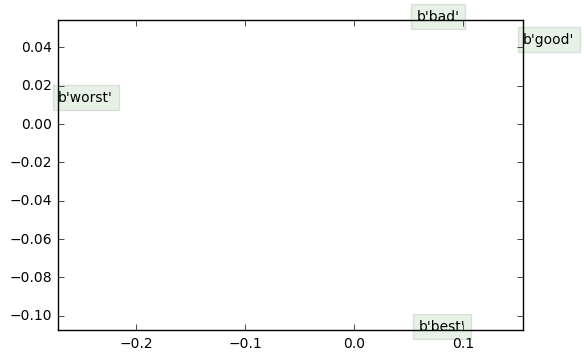

In [41]:
visualizeWords = [b"good", b"best", b"bad", b"worst"]
visualizeIdx = [tokens[word] for word in visualizeWords]
visualizeVecs = wordVectors[visualizeIdx, :]
temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeIdx) * temp.T.dot(temp)
U,S,V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2]) 

for i in range(len(visualizeWords)):
    plt.text(coord[i,0], coord[i,1], visualizeWords[i], 
        bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(coord[:,0]), np.max(coord[:,0])))
plt.ylim((np.min(coord[:,1]), np.max(coord[:,1])))

plt.savefig('q3_word_vectors.png')
plt.show()